In [1]:
'''Importar Librerías'''
#Importar la librería pandas
import pandas as pd
#Importar la librería numpy
import numpy as np
#Importar la librería Matplot
import matplotlib.pyplot as plt
from matplotlib import style
#Importar la librería seaborn
import seaborn as sns

#Importar la librería 
from scipy.stats import pearsonr
#Importar la librería Linear Regressioner
from sklearn.linear_model import LinearRegression
#Importar la librería Train_test_split
from sklearn.model_selection import train_test_split
#Importar la librería Metrics
from sklearn import metrics 
#Importar la librería Make_scorer
from sklearn.metrics import make_scorer

In [2]:
'''Cargar el dataset por medio del URL'''
#Url del dataset
url = "https://raw.githubusercontent.com/eabv/Regresion_lineal-/main/insurance.csv"
#Cargar los datos en la base a la URL del dataset
df = pd.read_csv(url)
#Mostrar 5 datos aleatorios
df.sample(5)

,age,sex,bmi,children,smoker,region,charges
676,55,female,40.810,3,no,southeast,12485.80090
249,29,male,28.975,1,no,northeast,4040.55825
250,18,male,17.290,2,yes,northeast,12829.45510
690,21,male,27.360,0,no,northeast,2104.11340
242,55,female,26.800,1,no,southwest,35160.13457


In [3]:
#Descripción del dataset
round(df.describe())

,age,bmi,children,charges
count,1338.0,1338.0,1338.0,1338.0
mean,39.0,31.0,1.0,13270.0
std,14.0,6.0,1.0,12110.0
min,18.0,16.0,0.0,1122.0
25%,27.0,26.0,0.0,4740.0
50%,39.0,30.0,1.0,9382.0
75%,51.0,35.0,2.0,16640.0
max,64.0,53.0,5.0,63770.0


In [4]:
df['charges'].describe()

count     1338.000000
mean     13270.422265
std      12110.011237
min       1121.873900
25%       4740.287150
50%       9382.033000
75%      16639.912515
max      63770.428010
Name: charges, dtype: float64

In [5]:
df.groupby('sex').count()

,age,bmi,children,smoker,region,charges
sex,,,,,,
female,662,662,662,662,662,662
male,676,676,676,676,676,676


In [6]:
# mapeo para sexo
d1 = {'female':0,'male':1}
df['sex'] = df['sex'].map(d1)

In [7]:
df.groupby('region').count()

,age,sex,bmi,children,smoker,charges
region,,,,,,
northeast,324,324,324,324,324,324
northwest,325,325,325,325,325,325
southeast,364,364,364,364,364,364
southwest,325,325,325,325,325,325


In [8]:
d2 = {'northeast':0,'northwest':1,'southeast':2,'southwest':3}
df['region'] = df['region'].map(d2)

In [9]:
df.groupby('smoker').count()

,age,sex,bmi,children,region,charges
smoker,,,,,,
no,1064,1064,1064,1064,1064,1064
yes,274,274,274,274,274,274


In [10]:
d3 = {'no':0,'yes':'1'}
df['smoker'] = df['smoker'].map(d3)

In [11]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,1,10600.54830
1334,18,0,31.920,0,0,0,2205.98080
1335,18,0,36.850,0,0,2,1629.83350
1336,21,0,25.800,0,0,3,2007.94500


In [12]:
X = ['age','sex','bmi','children','smoker','region']
y = ['charges']
X_train, X_test, y_train, y_test = train_test_split(df[X],df[y], train_size = 0.3, random_state = 100)

In [13]:
lin_reg = LinearRegression()
lin_reg.fit(X_train,y_train)
y_pred_sk = lin_reg.predict(X_test)

In [14]:
lin_reg.score(X_test,y_test)

0.744891854589675

In [15]:
# Imprimir algunos valores de muestra de predicción
TestingDataResults=pd.DataFrame(data=X_test, columns=X)
TestingDataResults[y]=y_test
TestingDataResults[('Predicted'+'Charges')]=np.round(y_pred_sk)

In [16]:
# Impresión de valores muestra de la predicción
print(TestingDataResults[['charges','Predicted'+'Charges']].head())

# Cálculo del error para cada fila
TestingDataResults['APE']=100 * ((abs(
TestingDataResults['charges']-TestingDataResults['PredictedCharges']))/TestingDataResults['charges'])

MAPE=np.mean(TestingDataResults['APE'])
MedianMAPE=np.median(TestingDataResults['APE'])

Accuracy =100 - MAPE
MedianAccuracy=100- MedianMAPE
print('Mean Accuracy de test data:', Accuracy)
print('Median Accuracy de test data:', MedianAccuracy)

#Accuracy Score
def Accuracy_Score(orig,pred):
    MAPE = np.mean(100 * (np.abs(orig-pred)/orig))
    return(100-MAPE)

#Cálculo MAPE de puntuación personalizada  
custom_Scoring=make_scorer(Accuracy_Score, greater_is_better=True)


         charges  PredictedCharges
12    1826.84300            3843.0
306  20177.67113            3573.0
318   7421.19455            8317.0
815   1877.92940            2567.0
157  15518.18025           24857.0
Mean Accuracy de test data: 64.11733392036678
Median Accuracy de test data: 76.88789412878971


C:\Users\HP\AppData\Local\Temp\ipykernel_31156\2547925205.py:4: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  axes.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()],


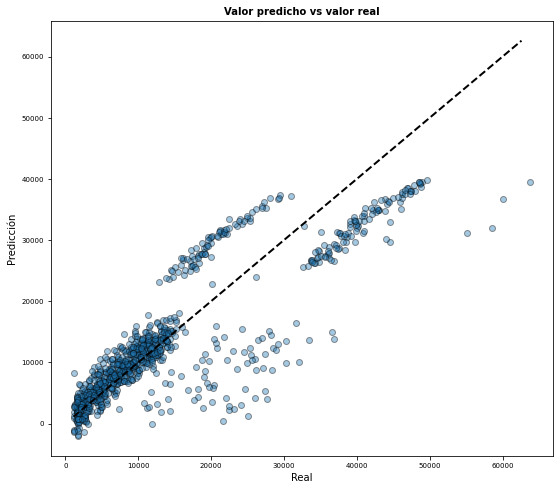

In [17]:
#Realizar la gráfica
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(9, 8))
axes.scatter(y_test, y_pred_sk, edgecolors=(0, 0, 0), alpha = 0.4)
axes.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()],
                'k--', color = 'black', lw=2)
axes.set_title('Valor predicho vs valor real', fontsize = 10, fontweight = "bold")
axes.set_xlabel('Real')
axes.set_ylabel('Predicción')
axes.tick_params(labelsize = 7)